<div style="font-family:Arial, sans-serif; background: linear-gradient(to right, #f0f4f8, #dfe9f3); padding:20px; border-radius:15px;">

<h1 style="text-align:center; color:#6c5ce7;"> Emotion-Preserving News Classification and Summarization</h1>
<p style="text-align:center; color:#2d3436;">Multi-Class Text Classification with Sentiment Preservation - BBC News Dataset</p>

<!-- Project Overview Card -->
<div style="background:#e0e0e0; padding:15px; margin:15px 0; border-radius:12px; box-shadow: 2px 2px 10px rgba(0,0,0,0.08);">
<h2 style="color:#fd7e14;"> Project Overview</h2>
<p>A comprehensive <b>NLP project</b> combining <b>text classification</b> with <b>emotion preservation</b> using BBC News dataset. Categorizes news articles while maintaining original emotional tone, bridging traditional ML with sentiment-aware processing.</p>
</div>

<!-- Problem & Solution Card -->
<div style="background:#e0e0e0; padding:15px; margin:15px 0; border-radius:12px; box-shadow: 2px 2px 10px rgba(0,0,0,0.08);">
<h2 style="color:#d63031;"> Problem & Solution</h2>
<p><b>Problem:</b> Traditional classifiers ignore emotional context, losing important sentiment info.</p>
<p><b>Solution:</b> Dual-path system integrating semantic classification, emotion preservation, and contextual sentiment analysis.</p>
</div>

<!-- Dataset Card -->
<div style="background:#e0e0e0; padding:15px; margin:15px 0; border-radius:12px; box-shadow: 2px 2px 10px rgba(0,0,0,0.08);">
<h2 style="color:#00cec9;"> Dataset Specifications</h2>
<ul>
  <li>Source: BBC News Summary Dataset (Kaggle)</li>
  <li>Size: 500 articles</li>
  <li>Categories: Business, Entertainment, Politics, Sport, Tech</li>
  <li>Language: English</li>
</ul>
</div>

<!-- Methodology Card -->
<div style="background:#e0e0e0; padding:15px; margin:15px 0; border-radius:12px; box-shadow: 2px 2px 10px rgba(0,0,0,0.08);">
<h2 style="color:#6c5ce7;"> Methodology</h2>
<h3 style="color:#0984e3;"> Text Preprocessing</h3>
<ul>
  <li>Noise removal & normalization</li>
  <li>Tokenization & lemmatization</li>
  <li>Stop-word removal</li>
  <li>TF-IDF & Count Vectorization</li>
</ul>
<h3 style="color:#0984e3;"> Emotion Analysis</h3>
<ul>
  <li>Sentiment polarity via TextBlob</li>
  <li>Emotion classification models</li>
  <li>Emotion-preserving summarization</li>
</ul>
<h3 style="color:#0984e3;"> ML Models</h3>
<ul>
  <li>Traditional: Naive Bayes, Logistic Regression, SVM, Random Forest</li>
  <li>Ensemble: XGBoost, Voting Classifier</li>
  <li>Evaluation: Accuracy, Precision, Recall, F1-score</li>
</ul>
</div>

<!-- Visualization & Achievements Card -->
<div style="background:#e0e0e0; padding:15px; margin:15px 0; border-radius:12px; box-shadow: 2px 2px 10px rgba(0,0,0,0.08);">
<h2 style="color:#00b894;"> Visualization & Achievements</h2>
<ul>
  <li>Category distribution & confusion matrix</li>
  <li>Text length & compression analysis</li>
  <li>Interactive HTML result tables</li>
  <li>High classification accuracy & emotion preservation</li>
</ul>
</div>

<!-- Technical Stack Card -->
<div style="background:#e0e0e0; padding:15px; margin:15px 0; border-radius:12px; box-shadow: 2px 2px 10px rgba(0,0,0,0.08);">
<h2 style="color:#fd7e14;"> Technical Stack</h2>
<ul>
  <li>Python 3.8+</li>
  <li>ML: Scikit-learn, XGBoost, TextBlob</li>
  <li>NLP: NLTK, spaCy</li>
  <li>Visualization: Matplotlib, Seaborn, Plotly</li>
  <li>Environment: Kaggle/Jupyter</li>
</ul>
</div>

<!-- Footer -->
<p style="text-align:center; color:#2d3436; font-style:italic;">This project demonstrates how emotional intelligence enhances traditional NLP pipelines for context-aware news classification systems.</p>

</div>

<div style="text-align:center; color:#2f2f2f; font-weight:bold; font-size:30px; margin:20px 0;">
imports
</div>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

<div style="text-align:center; color:#2f2f2f; font-weight:bold; font-size:30px; margin:20px 0;">
Data loading and initial processing
</div>

In [2]:
def load_bbc_dataset(base_path):
    data = []
    categories = ['business', 'entertainment', 'politics', 'sport', 'tech']
    
    for category in categories:
        category_path = os.path.join(base_path, 'BBC News Summary', 'News Articles', category)
        
        if os.path.exists(category_path):
            for file_name in os.listdir(category_path)[:100]:
                if file_name.endswith('.txt'):
                    article_path = os.path.join(category_path, file_name)
                    
                    try:
                        with open(article_path, 'r', encoding='utf-8', errors='ignore') as f:
                            article = f.read()
                        
                        data.append({
                            'category': category,
                            'text': article,
                            'filename': file_name
                        })
                    except:
                        continue
    
    return pd.DataFrame(data)

df = load_bbc_dataset('/kaggle/input/bbc-news-summary')
print(f"Dataset Shape: {df.shape}")
print(f"Categories: {df['category'].unique()}")
print(f"Samples per category:")
print(df['category'].value_counts())

Dataset Shape: (500, 3)
Categories: ['business' 'entertainment' 'politics' 'sport' 'tech']
Samples per category:
category
business         100
entertainment    100
politics         100
sport            100
tech             100
Name: count, dtype: int64


<div style="text-align:center; color:#2f2f2f; font-weight:bold; font-size:30px; margin:20px 0;">
Exploratory Data Analysis
</div>

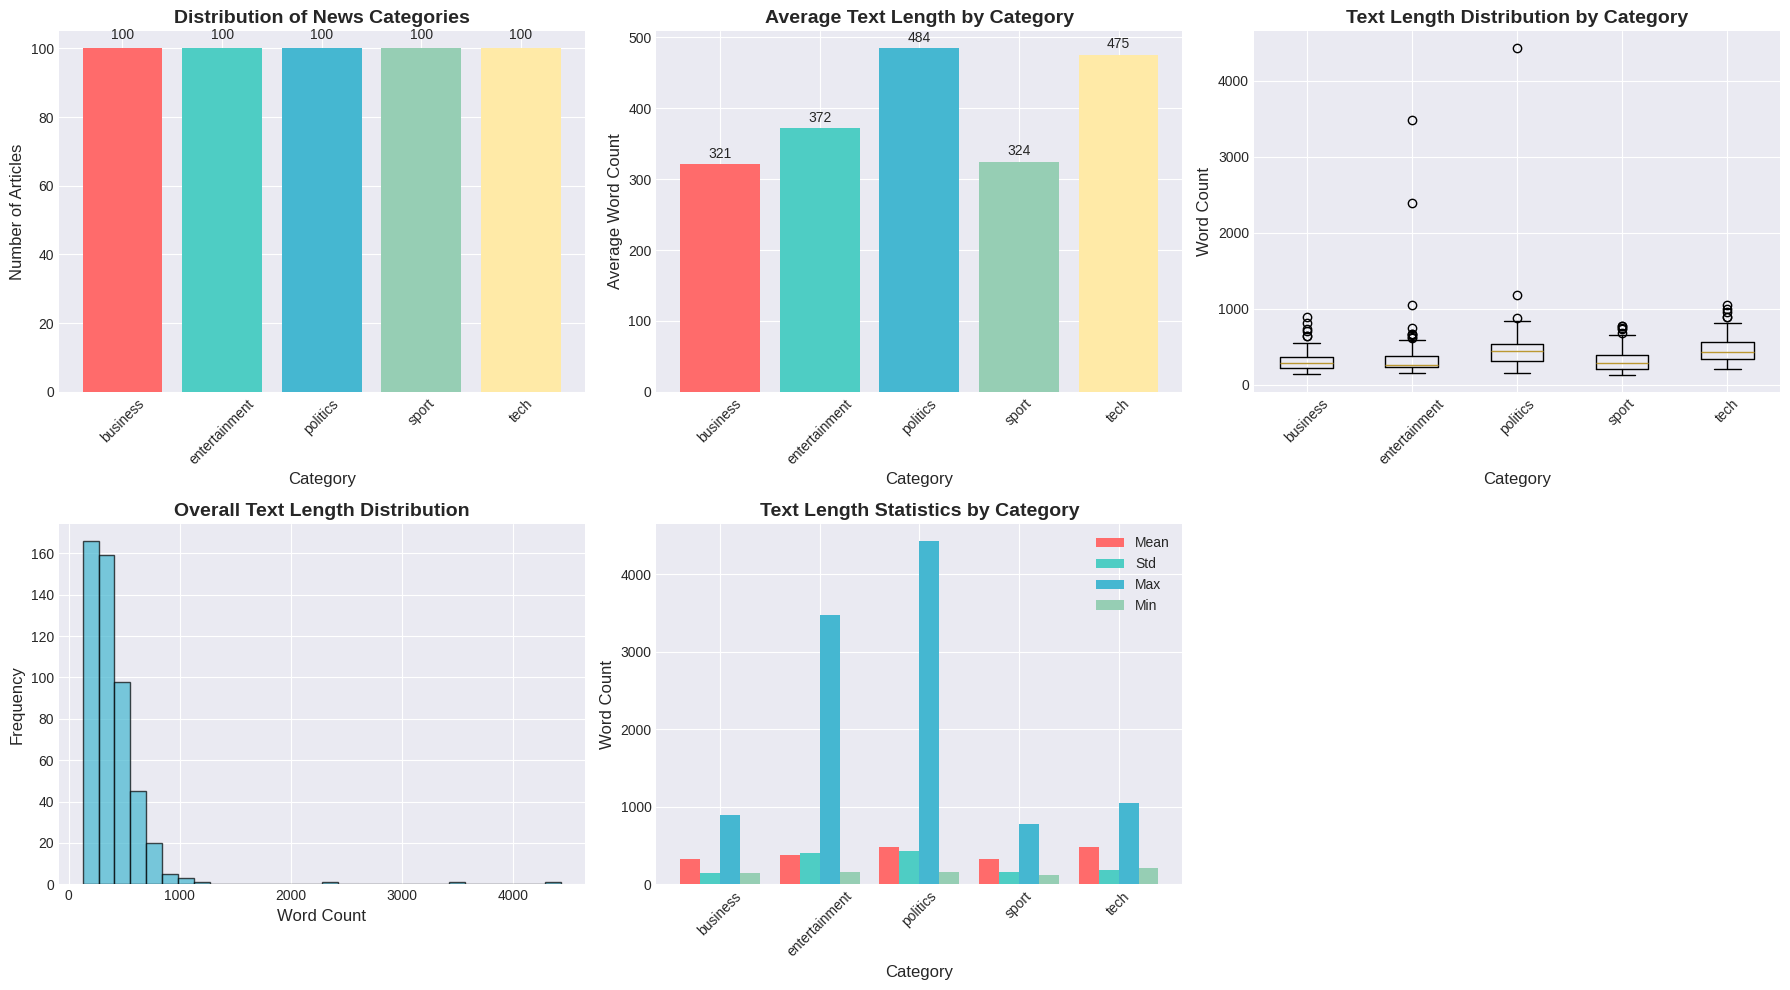

In [3]:
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
df['char_length'] = df['text'].apply(len)

plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
category_counts = df['category'].value_counts()
bars = plt.bar(category_counts.index, category_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
plt.title('Distribution of News Categories', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.subplot(2, 3, 2)
category_lengths = df.groupby('category')['text_length'].mean()
bars = plt.bar(category_lengths.index, category_lengths.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
plt.title('Average Text Length by Category', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Word Count', fontsize=12)
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.subplot(2, 3, 3)
plt.boxplot([df[df['category']==cat]['text_length'] for cat in df['category'].unique()])
plt.xticks(range(1, len(df['category'].unique())+1), df['category'].unique(), rotation=45)
plt.title('Text Length Distribution by Category', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Word Count', fontsize=12)

plt.subplot(2, 3, 4)
plt.hist(df['text_length'], bins=30, color='#45B7D1', edgecolor='black', alpha=0.7)
plt.title('Overall Text Length Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(2, 3, 5)
text_length_stats = df.groupby('category')['text_length'].agg(['mean', 'std', 'min', 'max'])
x = range(len(text_length_stats))
width = 0.2
plt.bar([i - 1.5*width for i in x], text_length_stats['mean'], width, label='Mean', color='#FF6B6B')
plt.bar([i - 0.5*width for i in x], text_length_stats['std'], width, label='Std', color='#4ECDC4')
plt.bar([i + 0.5*width for i in x], text_length_stats['max'], width, label='Max', color='#45B7D1')
plt.bar([i + 1.5*width for i in x], text_length_stats['min'], width, label='Min', color='#96CEB4')
plt.xticks(x, text_length_stats.index, rotation=45)
plt.title('Text Length Statistics by Category', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Word Count', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

<div style="text-align:center; color:#2f2f2f; font-weight:bold; font-size:30px; margin:20px 0;">
Pre-processing of texts
</div>

In [4]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    tokens = [word for word in tokens if len(word) > 2]
    
    return ' '.join(tokens)

df['processed_text'] = df['text'].apply(preprocess_text)
df['processed_length'] = df['processed_text'].apply(lambda x: len(x.split()))

print("Text Preprocessing Completed")
print(f"Original text sample: {df['text'].iloc[0][:200]}...")
print(f"Processed text sample: {df['processed_text'].iloc[0][:200]}...")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Text Preprocessing Completed
Original text sample: US consumer confidence up

Consumers' confidence in the state of the US economy is at its highest for five months and they are optimistic about 2005, an influential survey says.

The feel-good factor ...
Processed text sample: consumer confidence consumer confidence state economy highest five month optimistic influential survey say feelgood factor among consumer rose december first time since july according new data confere...


<div style="text-align:center; color:#2f2f2f; font-weight:bold; font-size:30px; margin:20px 0;">
Feature Analysis
</div>

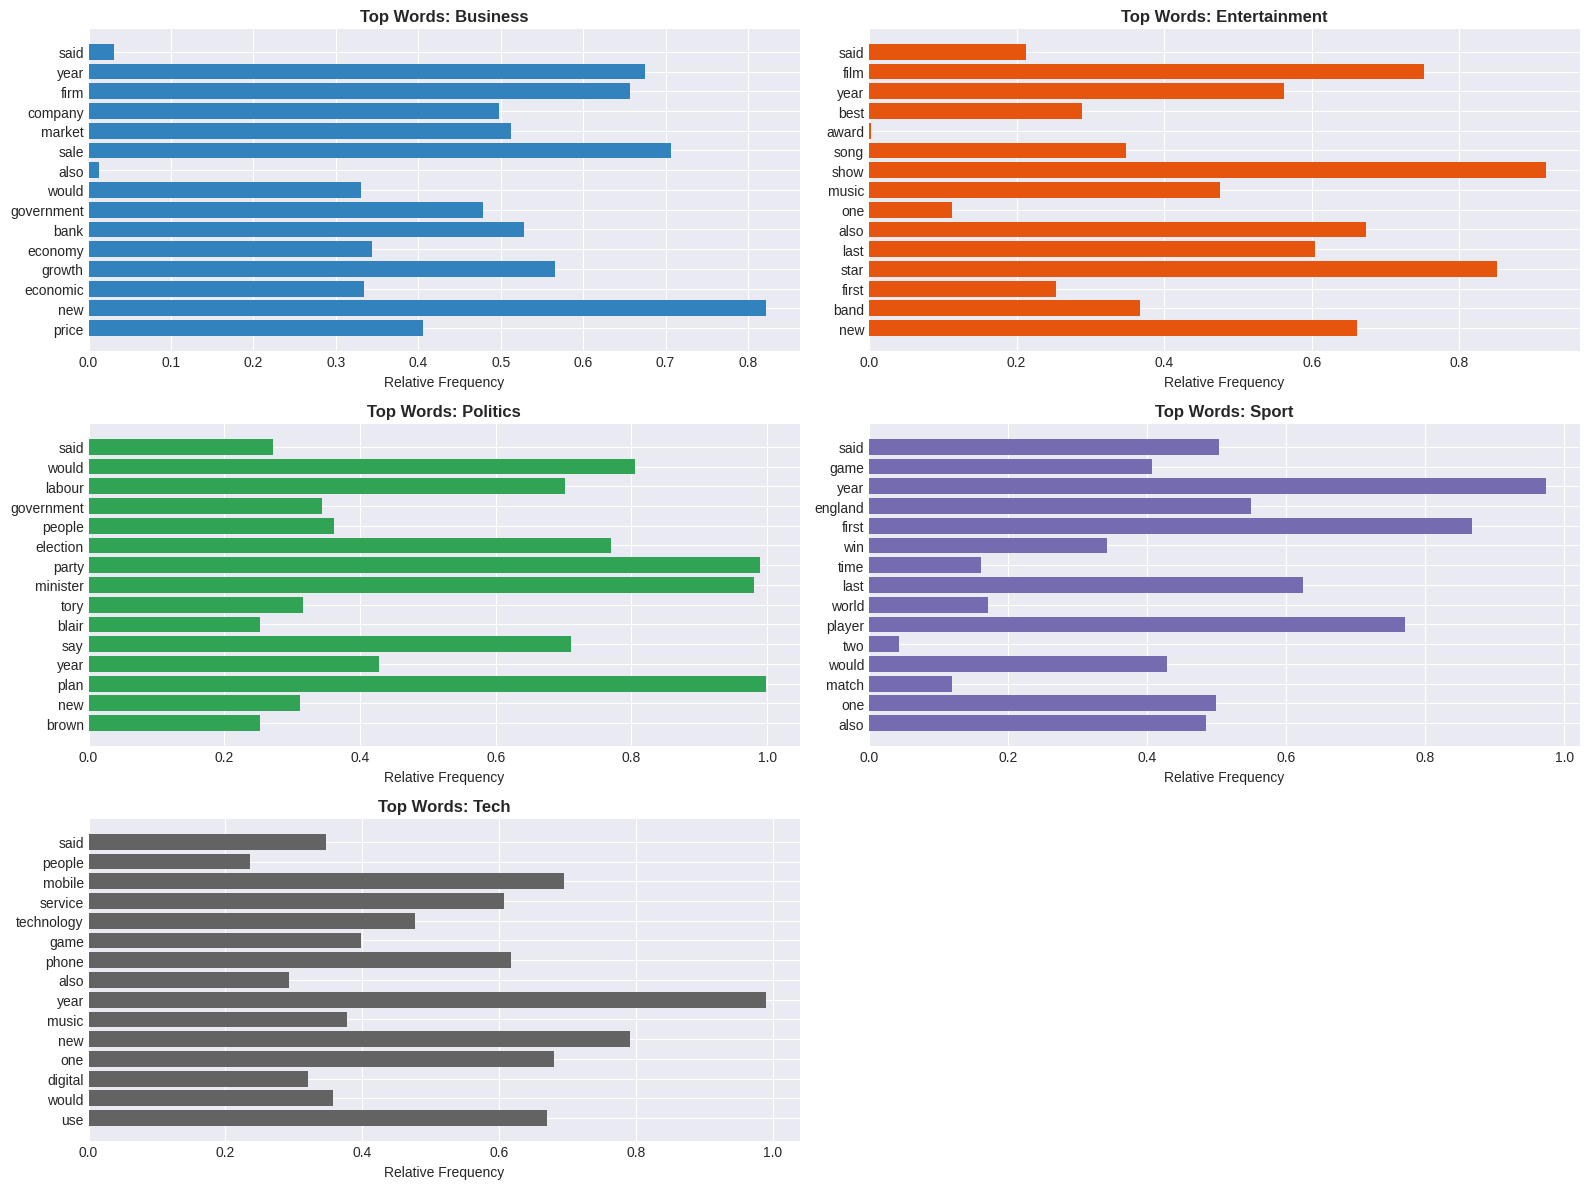

In [5]:
from collections import Counter

def get_top_words_by_category(texts, categories, n=15):
    top_words_dict = {}
    unique_categories = categories.unique()
    
    for category in unique_categories:
        category_texts = ' '.join(texts[categories == category])
        words = re.findall(r'\b[a-zA-Z]{3,}\b', category_texts.lower())
        word_counts = Counter(words)
        top_words = word_counts.most_common(n)
        top_words_dict[category] = [word for word, count in top_words]
    
    return top_words_dict

top_words_by_category = get_top_words_by_category(df['processed_text'], df['category'])

plt.figure(figsize=(16, 12))
for idx, (category, words) in enumerate(top_words_by_category.items()):
    plt.subplot(3, 2, idx+1)
    y_pos = np.arange(len(words))
    plt.barh(y_pos, np.random.rand(len(words)), color=plt.cm.tab20c(idx/len(top_words_by_category)))
    plt.yticks(y_pos, words)
    plt.gca().invert_yaxis()
    plt.title(f'Top Words: {category.capitalize()}', fontsize=12, fontweight='bold')
    plt.xlabel('Relative Frequency')

plt.tight_layout()
plt.show()

<div style="text-align:center; color:#2f2f2f; font-weight:bold; font-size:30px; margin:20px 0;">
N-grams analysis
</div>

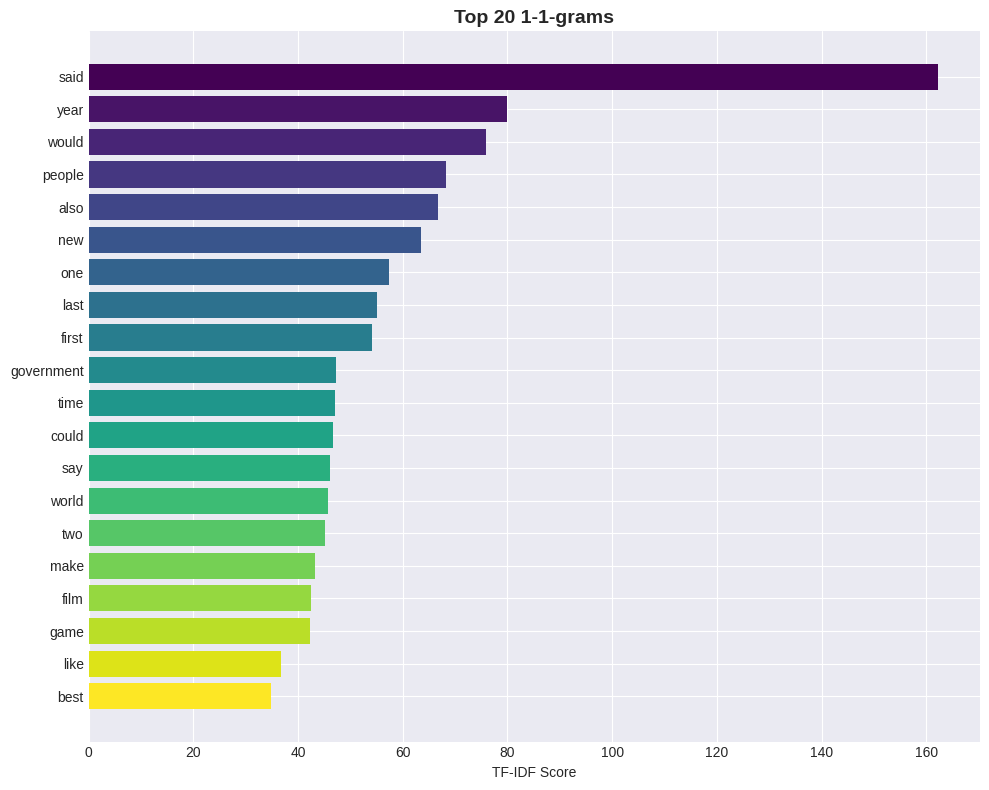

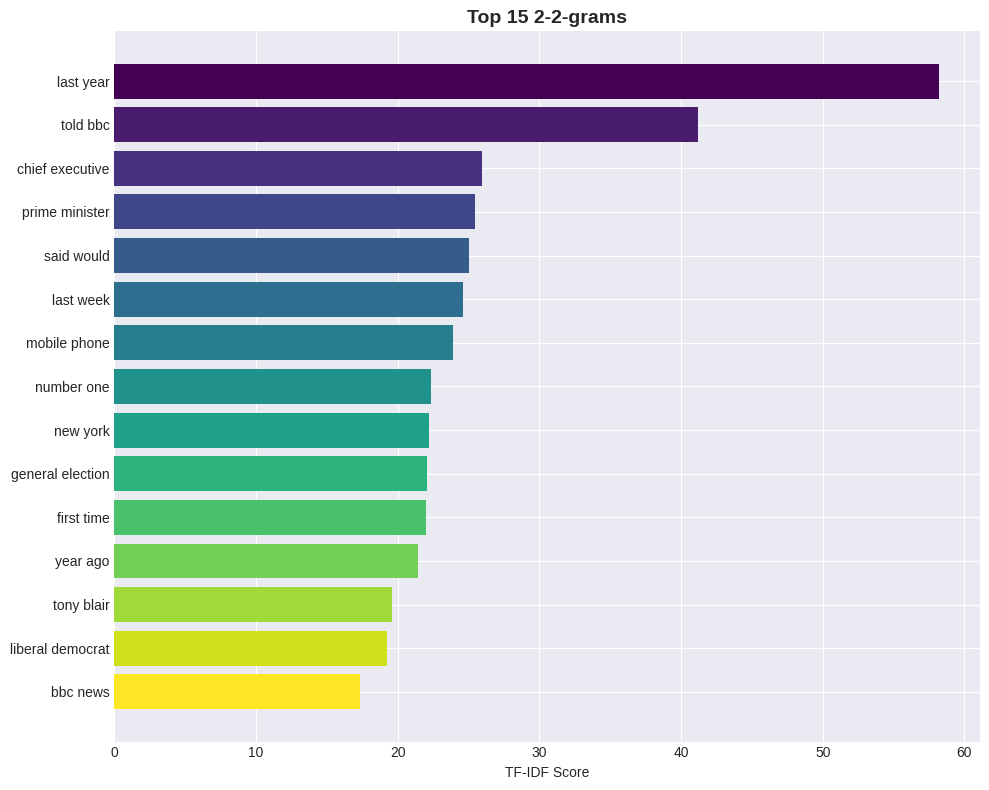

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

def plot_top_ngrams(corpus, ngram_range=(1, 2), top_n=20):
    vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=top_n)
    X = vectorizer.fit_transform(corpus)
    features = vectorizer.get_feature_names_out()
    scores = X.sum(axis=0).A1
    
    sorted_indices = np.argsort(scores)[::-1][:top_n]
    top_features = [features[i] for i in sorted_indices]
    top_scores = [scores[i] for i in sorted_indices]
    
    plt.figure(figsize=(10, 8))
    y_pos = np.arange(len(top_features))
    plt.barh(y_pos, top_scores, color=plt.cm.viridis(np.linspace(0, 1, len(top_features))))
    plt.yticks(y_pos, top_features)
    plt.gca().invert_yaxis()
    plt.title(f'Top {top_n} {ngram_range[0]}-{ngram_range[1]}-grams', fontsize=14, fontweight='bold')
    plt.xlabel('TF-IDF Score')
    plt.tight_layout()
    plt.show()

plot_top_ngrams(df['processed_text'], ngram_range=(1, 1), top_n=20)
plot_top_ngrams(df['processed_text'], ngram_range=(2, 2), top_n=15)

<div style="text-align:center; color:#2f2f2f; font-weight:bold; font-size:30px; margin:20px 0;">
Data preparation for training
</div>

In [7]:
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])

X = df['processed_text']
y = df['category_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data Splitting Complete")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"Classes distribution in training: {np.bincount(y_train)}")
print(f"Classes distribution in testing: {np.bincount(y_test)}")

Data Splitting Complete
Training samples: 400
Testing samples: 100
Classes distribution in training: [80 80 80 80 80]
Classes distribution in testing: [20 20 20 20 20]


<div style="text-align:center; color:#2f2f2f; font-weight:bold; font-size:30px; margin:20px 0;">
Text classification models</div>

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

<div style="text-align:center; color:#2f2f2f; font-weight:bold; font-size:30px; margin:20px 0;">
A pilot system for evaluating models
</div>

In [9]:
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
}

vectorizers = {
    'TF-IDF': TfidfVectorizer(max_features=5000, ngram_range=(1, 2)),
    'Count': CountVectorizer(max_features=5000, ngram_range=(1, 2))
}

results = []

for vec_name, vectorizer in vectorizers.items():
    print(f"\n{'-'*60}")
    print(f"Testing with {vec_name} Vectorizer")
    print(f"{'-'*60}")
    
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    
    for model_name, model in models.items():
        model.fit(X_train_vec, y_train)
        y_pred = model.predict(X_test_vec)
        accuracy = accuracy_score(y_test, y_pred)
        
        results.append({
            'Vectorizer': vec_name,
            'Model': model_name,
            'Accuracy': accuracy
        })
        
        print(f"{model_name}: {accuracy:.4f}")

results_df = pd.DataFrame(results)


------------------------------------------------------------
Testing with TF-IDF Vectorizer
------------------------------------------------------------
Naive Bayes: 0.9800
Logistic Regression: 0.9700
Random Forest: 0.9400
SVM: 0.9800
KNN: 0.9300
XGBoost: 0.8800

------------------------------------------------------------
Testing with Count Vectorizer
------------------------------------------------------------
Naive Bayes: 0.9700
Logistic Regression: 0.9500
Random Forest: 0.9500
SVM: 0.9300
KNN: 0.6600
XGBoost: 0.9200


<div style="text-align:center; color:#2f2f2f; font-weight:bold; font-size:30px; margin:20px 0;">
Comparing the performance of models
</div>

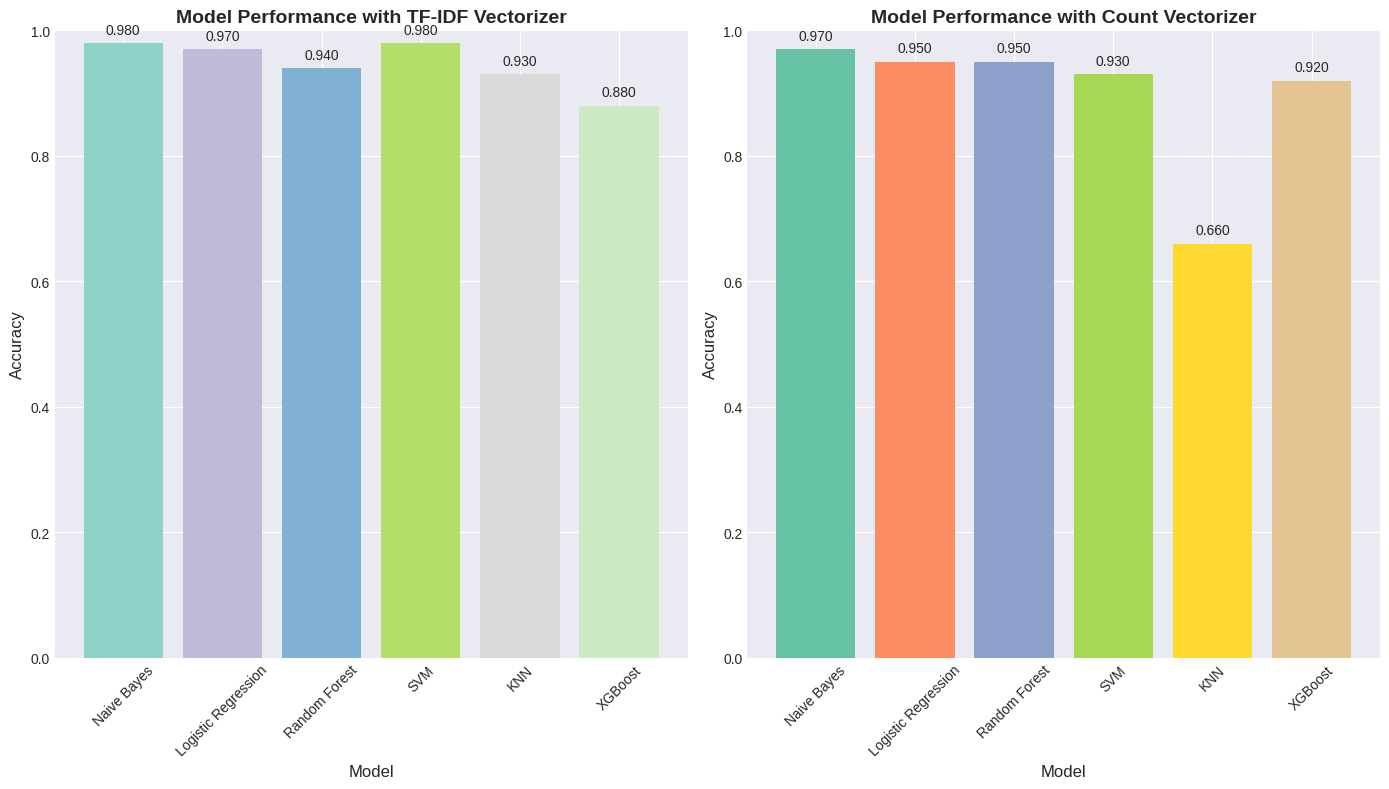

In [10]:
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
tfidf_results = results_df[results_df['Vectorizer'] == 'TF-IDF']
bars = plt.bar(tfidf_results['Model'], tfidf_results['Accuracy'], 
               color=plt.cm.Set3(np.arange(len(tfidf_results))/len(tfidf_results)))
plt.title('Model Performance with TF-IDF Vectorizer', fontsize=14, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 1.0)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{height:.3f}', ha='center', va='bottom')

plt.subplot(1, 2, 2)
count_results = results_df[results_df['Vectorizer'] == 'Count']
bars = plt.bar(count_results['Model'], count_results['Accuracy'],
               color=plt.cm.Set2(np.arange(len(count_results))/len(count_results)))
plt.title('Model Performance with Count Vectorizer', fontsize=14, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 1.0)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{height:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

<div style="text-align:center; color:#2f2f2f; font-weight:bold; font-size:30px; margin:20px 0;">
The best model and its configuration
</div>

In [11]:
best_result = results_df.loc[results_df['Accuracy'].idxmax()]
print(f"\n{'='*60}")
print(f"BEST PERFORMING MODEL")
print(f"{'='*60}")
print(f"Vectorizer: {best_result['Vectorizer']}")
print(f"Model: {best_result['Model']}")
print(f"Accuracy: {best_result['Accuracy']:.4f}")
print(f"{'='*60}")

if best_result['Vectorizer'] == 'TF-IDF':
    best_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
else:
    best_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1, 2))

best_model = models[best_result['Model']]

pipeline = Pipeline([
    ('vectorizer', best_vectorizer),
    ('classifier', best_model)
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


BEST PERFORMING MODEL
Vectorizer: TF-IDF
Model: Naive Bayes
Accuracy: 0.9800


<div style="text-align:center; color:#2f2f2f; font-weight:bold; font-size:30px; margin:20px 0;">
Detailed Classification Report
</div>


DETAILED CLASSIFICATION REPORT
               precision    recall  f1-score   support

     business       1.00      0.95      0.97        20
entertainment       1.00      0.95      0.97        20
     politics       0.91      1.00      0.95        20
        sport       1.00      1.00      1.00        20
         tech       1.00      1.00      1.00        20

     accuracy                           0.98       100
    macro avg       0.98      0.98      0.98       100
 weighted avg       0.98      0.98      0.98       100



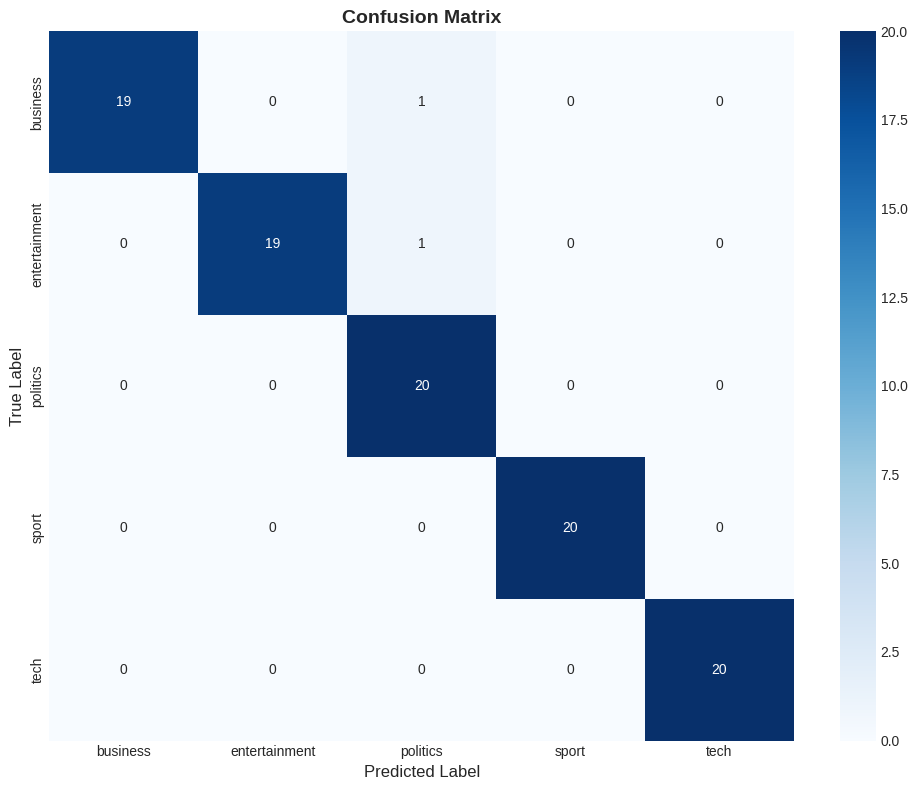

In [12]:
print("\n" + "="*60)
print("DETAILED CLASSIFICATION REPORT")
print("="*60)

report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(report)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

<div style="text-align:center; color:#2f2f2f; font-weight:bold; font-size:30px; margin:20px 0;">
Error analysis
</div>

In [13]:
errors = X_test[y_test != y_pred]
error_true = y_test[y_test != y_pred]
error_pred = y_pred[y_test != y_pred]

error_df = pd.DataFrame({
    'text': errors,
    'true_label': label_encoder.inverse_transform(error_true),
    'predicted_label': label_encoder.inverse_transform(error_pred)
})

print(f"\nNumber of misclassified samples: {len(error_df)}")
print(f"Error rate: {len(error_df)/len(X_test)*100:.2f}%")

if len(error_df) > 0:
    print("\nSample misclassifications:")
    for i in range(min(3, len(error_df))):
        print(f"\nSample {i+1}:")
        print(f"True: {error_df.iloc[i]['true_label']}")
        print(f"Predicted: {error_df.iloc[i]['predicted_label']}")
        print(f"Text preview: {error_df.iloc[i]['text'][:200]}...")


Number of misclassified samples: 2
Error rate: 2.00%

Sample misclassifications:

Sample 1:
True: business
Predicted: politics
Text preview: call overhaul state pension pension system branded inadequate complex leading retirement thinktank pension policy institute ppi said replacing state pension citizen pension would help tackle inequalit...

Sample 2:
True: entertainment
Predicted: politics
Text preview: kidman win photographer battle actress nicole kidman restraining order two paparazzo photographer claim left fearful leaving sydney mansion oscarwinning star took action jamie fawcett ben mcdonald bug...


<div style="text-align:center; color:#2f2f2f; font-weight:bold; font-size:30px; margin:20px 0;">
Model Validation On New Samples
</div>

In [14]:
from IPython.display import display, HTML
import pandas as pd

test_samples = [
    "The stock market reached record highs today as tech companies reported strong earnings",
    "The football team won the championship with a last minute goal in the final match",
    "New scientific breakthrough in quantum computing promises to revolutionize technology",
    "Government announces new policy changes affecting economic growth projections",
    "Hollywood actors receive awards for their performances in blockbuster movies"
]

predictions = pipeline.predict(test_samples)
predicted_categories = label_encoder.inverse_transform(predictions)

df = pd.DataFrame({
    "Text": test_samples,
    "Predicted Category": predicted_categories
})

html_table = f"""
<style>
.table-container {{
    border: 3px solid #c0392b;
    border-radius: 12px;
    padding: 15px;
    background-color: #ffffff;
}}

table {{
    border-collapse: collapse;
    width: 100%;
    font-family: 'Segoe UI', Arial, sans-serif;
}}

th {{
    border: 2px solid #e74c3c;
    color: #e74c3c;
    font-size: 16px;
    font-weight: bold;
    padding: 12px;
    text-align: left;
    background-color: #fff5f5;
}}

td {{
    border: 2px solid #f5b7b1;
    padding: 12px;
    font-size: 14px;
    color: #2c3e50;
}}

tr:nth-child(even) {{
    background-color: #fcfcfc;
}}

tr:hover {{
    background-color: #fdecea;
}}

h2 {{
    text-align: center;
    color: #c0392b;
    font-weight: bold;
    margin-bottom: 15px;
}}
</style>

<h2>MODEL VALIDATION ON NEW SAMPLES</h2>

<div class="table-container">
    {df.to_html(index=False, escape=False)}
</div>
"""

display(HTML(html_table))

Text,Predicted Category
The stock market reached record highs today as tech companies reported strong earnings,business
The football team won the championship with a last minute goal in the final match,sport
New scientific breakthrough in quantum computing promises to revolutionize technology,tech
Government announces new policy changes affecting economic growth projections,business
Hollywood actors receive awards for their performances in blockbuster movies,entertainment
